In [3]:
!pip install pulp
from pulp import *

In [38]:
# Creates a list of the Toys
toys = ['SOLDIER', 'TRAIN']

# A dictionary of the profits per toy
profit = {'SOLDIER': 3, 
         'TRAIN': 2}

# A dictionary of the resource consumption per product
consumption = {'CARPENTING':
               {'SOLDIER': 1,
                'TRAIN': 1
               },
               'FINISHING':
               {'SOLDIER': 2,
                'TRAIN': 1 
               }
              }

# A dictionary of maximum output values (-1 is non binding)
maxOutput = {'SOLDIER': -1, 
              'TRAIN': -1}

# A dictionary of the resource availabilities
resources = {
    'CARPENTING': 80,
    'FINISHING': 100
}

soldierAmounts = []
trainAmounts = []
objectiveValues = []
coefficientValues = []

for k in range(35):
    profit['SOLDIER'] = 1+(k+1)*0.1
    
    # Create the 'prob' variable to contain the problem data
    prob = LpProblem("Toy Factory Problem", LpMaximize)

    # A dictionary called 'production_vars' is created to contain the referenced Variables
    x = LpVariable.dicts("Toy",toys,0)

    # Create objective function
    prob += lpSum([profit[i]*x[i] for i in toys]), "Total Profit of Production"

    # Create resource constraints
    for resource in resources.keys():
        prob += lpSum([x[i]*consumption[resource][i] for i in toys]) <= resources[resource], "{}".format(resource)

    # Create max Output constraints
    for toy in toys:
        if(maxOutput[toy] >= 0):
            prob += x[toy] <= maxOutput[toy], "maxOutput{}".format(toy)


    # Optimize
    prob.solve()
    print("%s: %i Soldiers %i Trains | Profit: %f" % ( round(1+(k+1)*0.1,2), x["SOLDIER"].varValue, x["TRAIN"].varValue, value(prob.objective)))

    
    soldierAmounts.append(x["SOLDIER"].varValue)
    trainAmounts.append(x["TRAIN"].varValue)
    coefficientValues.append(round(1+(k+1)*0.1,2))
    objectiveValues.append(value(prob.objective))
    
    # Print the value of the objective
    #print("Objective = %f" % value(prob.objective))

1.1: 0 Soldiers 80 Trains | Profit: 160.000000
1.2: 0 Soldiers 80 Trains | Profit: 160.000000
1.3: 0 Soldiers 80 Trains | Profit: 160.000000
1.4: 0 Soldiers 80 Trains | Profit: 160.000000
1.5: 0 Soldiers 80 Trains | Profit: 160.000000
1.6: 0 Soldiers 80 Trains | Profit: 160.000000
1.7: 0 Soldiers 80 Trains | Profit: 160.000000
1.8: 0 Soldiers 80 Trains | Profit: 160.000000
1.9: 0 Soldiers 80 Trains | Profit: 160.000000
2.0: 0 Soldiers 80 Trains | Profit: 160.000000
2.1: 20 Soldiers 60 Trains | Profit: 162.000000
2.2: 20 Soldiers 60 Trains | Profit: 164.000000
2.3: 20 Soldiers 60 Trains | Profit: 166.000000
2.4: 20 Soldiers 60 Trains | Profit: 168.000000
2.5: 20 Soldiers 60 Trains | Profit: 170.000000
2.6: 20 Soldiers 60 Trains | Profit: 172.000000
2.7: 20 Soldiers 60 Trains | Profit: 174.000000
2.8: 20 Soldiers 60 Trains | Profit: 176.000000
2.9: 20 Soldiers 60 Trains | Profit: 178.000000
3.0: 20 Soldiers 60 Trains | Profit: 180.000000
3.1: 20 Soldiers 60 Trains | Profit: 182.000000
3.

In [34]:
from matplotlib import pyplot as plt

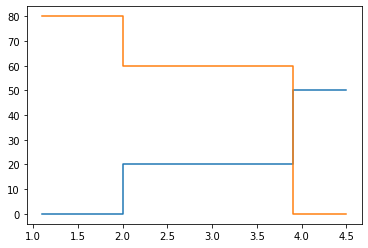

In [41]:
plt.step(coefficientValues, soldierAmounts,
         coefficientValues, trainAmounts);